In [1]:
import skimage
import cv2
import numpy as np
import pandas as pd
from skimage import feature
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
img = np.array(Image.open('32w_4th_RTtest_data/1/44_0_1.jpg'))
img2 = np.array(Image.open('32w_4th_RTtest_data/1/0_0_1.jpg'))

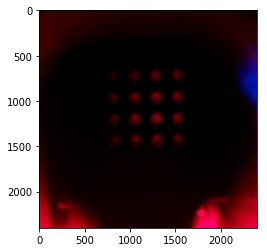

In [3]:
plt.imshow(img)

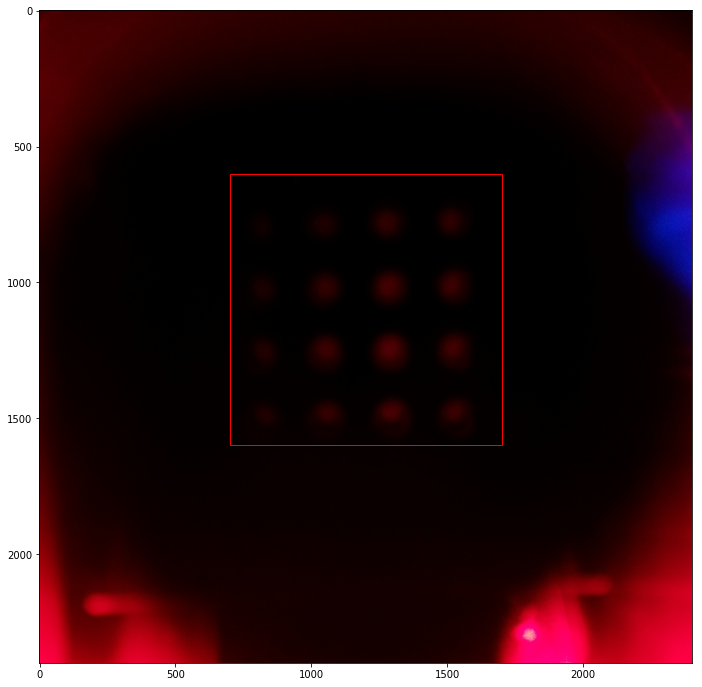

In [4]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img2, interpolation='nearest', cmap=plt.cm.gray)
rect = matplotlib.patches.Rectangle((700, 600), 1000, 1000, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [5]:
plt.imshow(im[500:1600, 600:1700])

NameError: name 'im' is not defined

In [ ]:
plt.imshow(im2[500:1600, 600:1700])

In [12]:
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [13]:
im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [6]:
im_hsv = cv2.cvtColor(img[500:1600, 600:1700], cv2.COLOR_BGR2HSV)

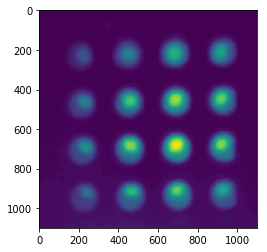

In [9]:
plt.imshow(im_hsv[:, :, 2])

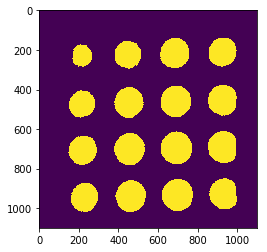

In [10]:
im_gray = im_hsv[:, :, 2]
thresh = skimage.filters.threshold_mean(im_gray)
threshed_im = im_gray > thresh
plt.imshow(threshed_im)

# Canny

In [14]:
edges = feature.canny(im)

In [15]:
hough_radii  = np.arange(20, 35, 2)
hough_res = skimage.transform.hough_circle(edges, radii)

NameError: name 'radii' is not defined

In [16]:
accums, cx, cy, radii = skimage.transform.hough_circle_peaks(hough_res, hough_radii , total_num_peaks=3)

NameError: name 'hough_res' is not defined

NameError: name 'cy' is not defined

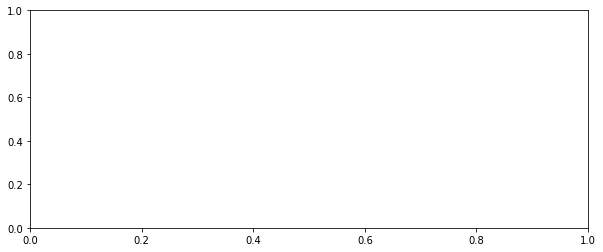

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = skimage.color.gray2rgb(im)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = skimage.draw.circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

# contour

In [18]:
contours = skimage.measure.find_contours(im, 0.8)

In [19]:
contours2 = skimage.measure.find_contours(im2, 0.8)

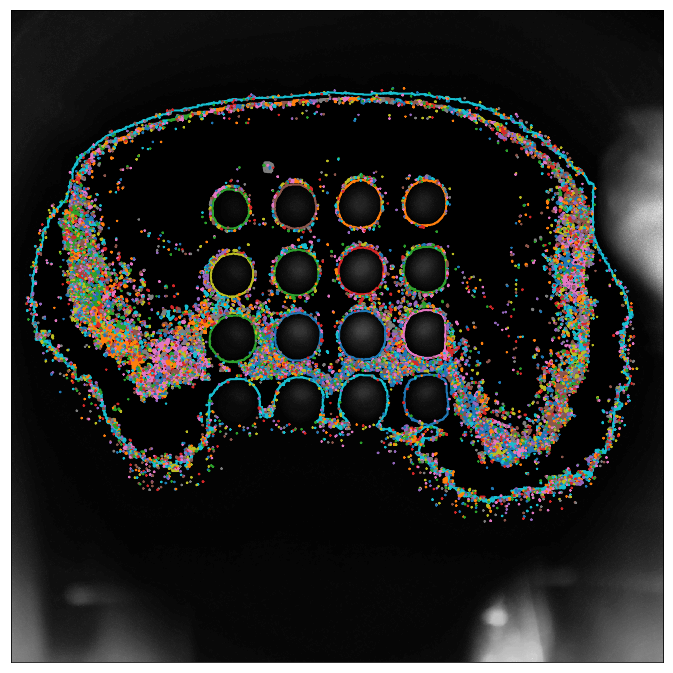

In [20]:
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(im, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [21]:
img[0][0]

array([38,  0,  0], dtype=uint8)

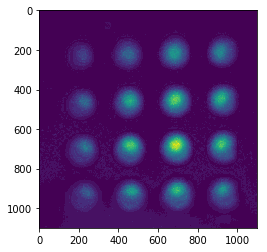

In [22]:
plt.imshow(im[500:1600, 600:1700])

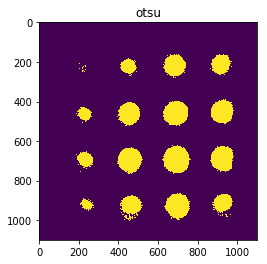

In [23]:
thresh = skimage.filters.threshold_otsu(im[500:1600, 600:1700])
filtered_im = np.array(im > thresh)
plt.imshow(filtered_im[500:1600, 600:1700])
plt.title('otsu')
thresh_dict = {'otsu': thresh}

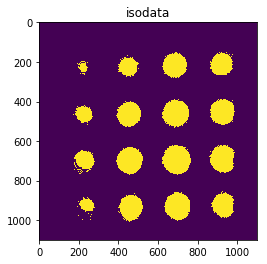

In [24]:
thresh = skimage.filters.threshold_isodata(im[500:1600, 600:1700])
filtered_im = np.array(im > thresh)
plt.imshow(filtered_im[500:1600, 600:1700])
plt.title('isodata')
thresh_dict['isodata'] = thresh

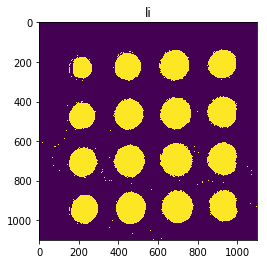

In [25]:
thresh = skimage.filters.threshold_li(im[500:1600, 600:1700])
filtered_im = np.array(im > thresh)
plt.imshow(filtered_im[500:1600, 600:1700])
plt.title('li')
thresh_dict['li'] = thresh

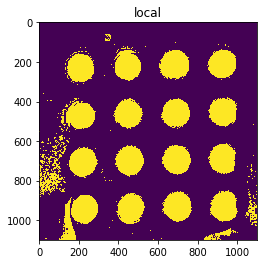

In [26]:
thresh = skimage.filters.threshold_local(im[500:1600, 600:1700], 501)
filtered_im = im[500:1600, 600:1700] > thresh
plt.imshow(filtered_im)
plt.title('local')
thresh_dict['local'] = thresh

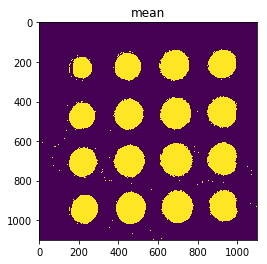

In [27]:
thresh = skimage.filters.threshold_mean(im[500:1600, 600:1700])
filtered_im = im[500:1600, 600:1700] > thresh
plt.imshow(filtered_im)
plt.title('mean')
thresh_dict['mean'] = thresh

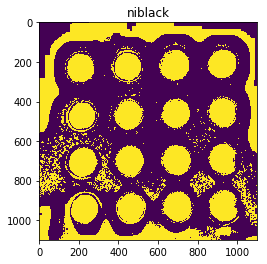

In [28]:
thresh = skimage.filters.threshold_niblack(im[500:1600, 600:1700], window_size=151)
filtered_im = im[500:1600, 600:1700] > thresh
plt.imshow(filtered_im)
plt.title('niblack')
thresh_dict['niblack'] = thresh

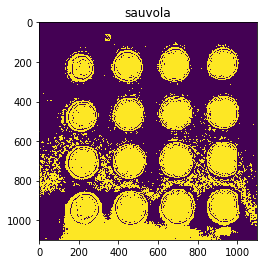

In [29]:
thresh = skimage.filters.threshold_sauvola(im[500:1600, 600:1700])
filtered_im = im[500:1600, 600:1700] > thresh
plt.imshow(filtered_im)
plt.title('sauvola')
thresh_dict['sauvola'] = thresh

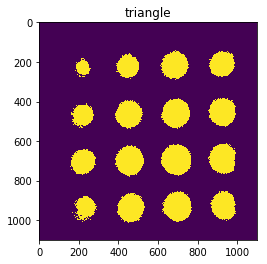

In [30]:
thresh = skimage.filters.threshold_triangle(im[500:1600, 600:1700])
filtered_im = im[500:1600, 600:1700] > thresh
plt.imshow(filtered_im)
plt.title('triangle')
thresh_dict['triangle'] = thresh

In [31]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [32]:
thresh_dict

{'otsu': 4,
 'isodata': 3,
 'li': 1.6738252830730351,
 'local': array([[0.0052619 , 0.00526515, 0.0052717 , ..., 0.06166961, 0.06162525,
         0.06160308],
        [0.00526563, 0.00526888, 0.00527544, ..., 0.06170378, 0.0616594 ,
         0.06163721],
        [0.00527309, 0.00527635, 0.00528292, ..., 0.06177212, 0.06172769,
         0.06170548],
        ...,
        [0.16231418, 0.16238225, 0.16251838, ..., 0.33937128, 0.33923667,
         0.33916936],
        [0.16230835, 0.16237643, 0.16251254, ..., 0.33922477, 0.33909021,
         0.33902293],
        [0.1623055 , 0.16237357, 0.16250968, ..., 0.33915156, 0.33901704,
         0.33894977]]),
 'mean': 1.4535537190082644,
 'niblack': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],


Text(0.5,1,'at 44th cycle')

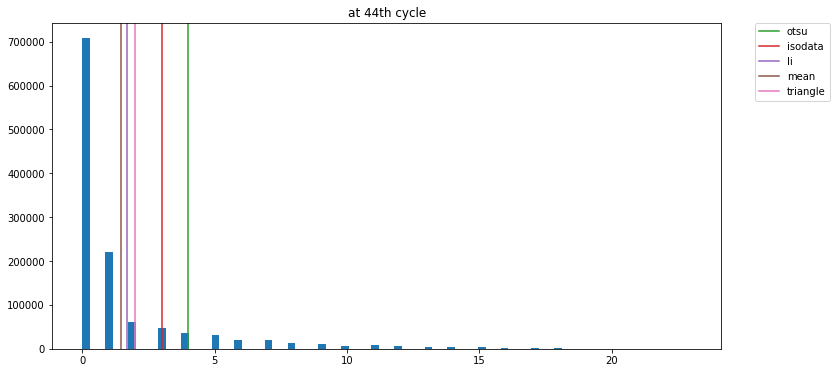

In [33]:
plt.figure(figsize=(12,6))
plt.hist(im[500:1600, 600:1700].ravel(), bins=80)
i = 2
for key in thresh_dict.keys():
    thresh = thresh_dict[key]
    if not isinstance(thresh, np.ndarray):
        plt.axvline(x=thresh_dict[key], color=colors[i], label=key)
        i += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('at 44th cycle')


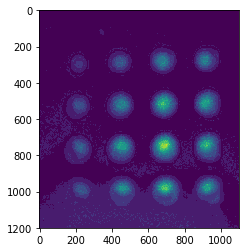

In [34]:
plt.imshow(im2[500:1700, 600:1700])

In [35]:
thresh_dict2 = {
    'otsu': skimage.filters.threshold_otsu(im2[500:1700, 600:1700]),
    'isodata': skimage.filters.threshold_isodata(im2[500:1700, 600:1700]),
    'li': skimage.filters.threshold_li(im2[500:1700, 600:1700]),
    'triangle': skimage.filters.threshold_triangle(im2[500:1700, 600:1700]),
    'mean': skimage.filters.threshold_mean(im2[500:1700, 600:1700])
}
thresh_dict2

c:\users\ympai\scoop\apps\python36\current\lib\site-packages\skimage\filters\thresholding.py:601: RuntimeWarning: divide by zero encountered in log
  (np.log(mean_back) - np.log(mean_fore)))


{'otsu': 2, 'isodata': 0, 'li': 0.0, 'triangle': 2, 'mean': 0.768589393939394}

Text(0.5,1,'li')

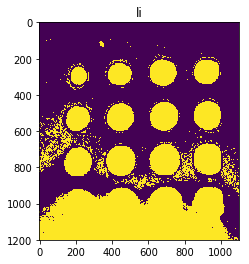

In [36]:
filtered_im = im2[500:1700, 600:1700] > thresh_dict2['li']
plt.imshow(filtered_im)
plt.title('li')

Text(0.5,1,'isodata')

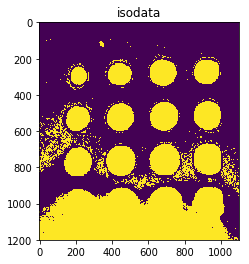

In [37]:
filtered_im = im2[500:1700, 600:1700] > thresh_dict2['isodata']
plt.imshow(filtered_im)
plt.title('isodata')

Text(0.5,1,'mean')

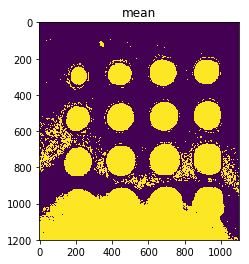

In [38]:
filtered_im = im2[500:1700, 600:1700] > thresh_dict2['mean']
plt.imshow(filtered_im)
plt.title('mean')

Text(0.5,1,'at 1st cycle')

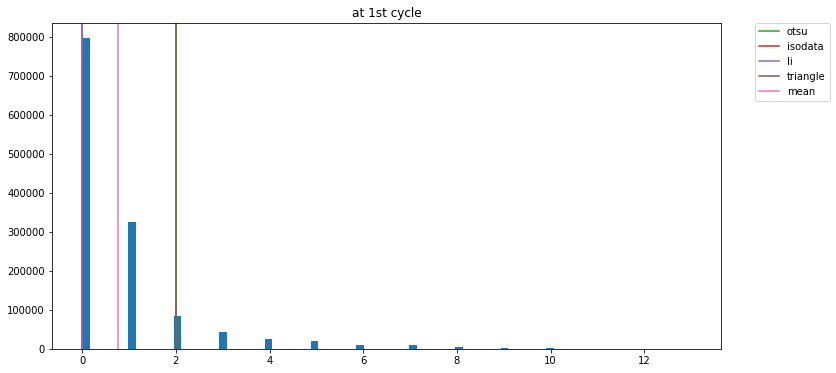

In [39]:
plt.figure(figsize=(12,6))
plt.hist(im2[500:1700, 600:1700].ravel(), bins=80)
i = 2
for key in thresh_dict2.keys():
    thresh = thresh_dict[key]
    if not isinstance(thresh, np.ndarray):
        plt.axvline(x=thresh_dict2[key], color=colors[i], label=key)
        i += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('at 1st cycle')


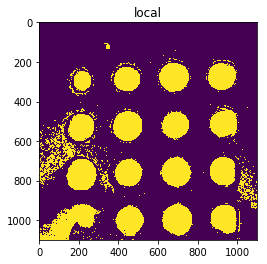

In [40]:
thresh = skimage.filters.threshold_local(im2[500:1600, 600:1700], 501)
filtered_im = im2[500:1600, 600:1700] > thresh
plt.imshow(filtered_im)
plt.title('local')
thresh_dict['local'] = thresh

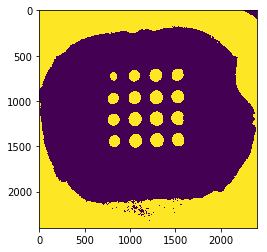

In [41]:
thresh3 = skimage.filters.threshold_otsu(im)
filtered_im3 = np.any(img > [thresh3, thresh3, thresh3], axis=-1)
plt.imshow(filtered_im3)

In [161]:
thresh2 = skimage.filters.threshold_yen(im2[500:1600, 600:1700])
filtered_im2 = np.any(img2 > [thresh2, thresh2, thresh2], axis=-1)

In [ ]:
645, 1460, 781, 1593

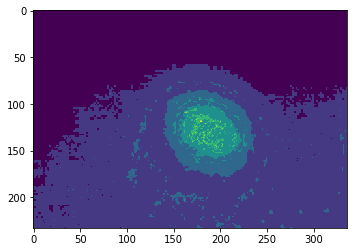

In [201]:
plt.imshow(im2[1360:1593, 645:981])

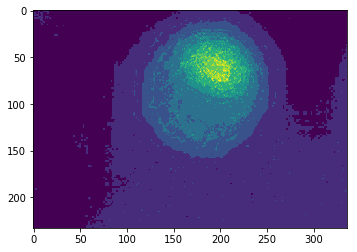

In [202]:
plt.imshow(im[1360:1593, 645:981])

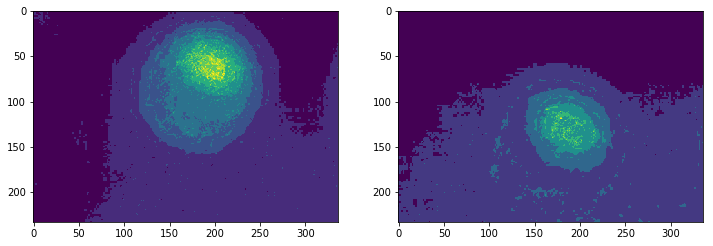

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im[1360:1593, 645:981])
ax[1].imshow(im2[1360:1593, 645:981])

In [256]:
thresh_li = [
    skimage.filters.threshold_otsu(im2[500:1600, 600:1700]),
    skimage.filters.threshold_yen(im2[500:1600, 600:1700]),
    skimage.filters.threshold_isodata(im2[500:1600, 600:1700]),
    skimage.filters.threshold_li(im2[500:1600, 600:1700]),
#     skimage.filters.threshold_local(im2[500:1600, 600:1700]),
#     skimage.filters.threshold_minimum(im2[500:1600, 600:1700]),
    skimage.filters.threshold_mean(im2[500:1600, 600:1700]),
    skimage.filters.threshold_niblack(im2[500:1600, 600:1700]),
    skimage.filters.threshold_sauvola(im2[500:1600, 600:1700]),
    skimage.filters.threshold_triangle(im2[500:1600, 600:1700]),
]


In [190]:
thresh_li[:5]

[2, 2, 1, 1.2451907417989645]

In [258]:
thresh_li

[2,
 3,
 1,
 0.0,
 0.7461148760330578,
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.60111138, 0.59149709, 0.58192218, ..., 0.        , 0.        ,
         0.        ],
        [0.58192218, 0.56763175, 0.55342537, ..., 0.        , 0.        ,
         0.        ],
        [0.56288707, 0.544     , 0.52525589, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.55516816, 0.54805451, 0.54094056, ..., 0.        , 0.     

ValueError: operands could not be broadcast together with shapes (2400,2400) (1100,1100) 

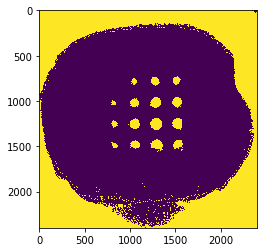

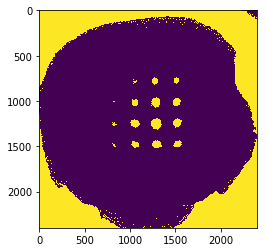

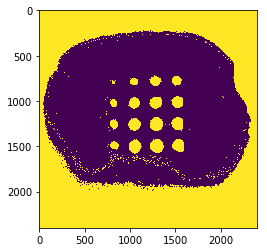

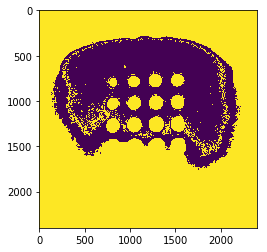

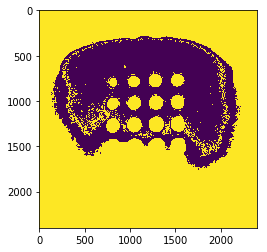

<Figure size 432x288 with 0 Axes>

In [257]:
for thr in thresh_li:
    plt.figure()
    plt.imshow(np.array(im2>thr))

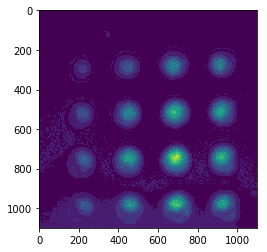

In [246]:
plt.imshow(im2[500:1600, 600:1700])

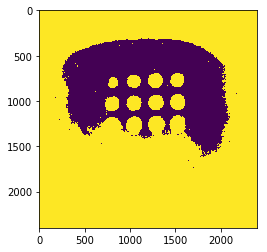

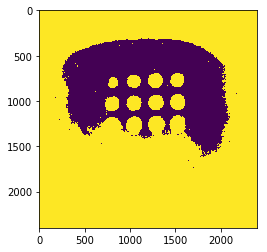

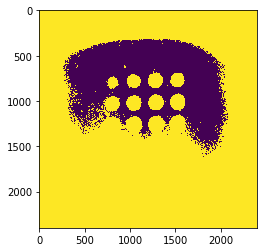

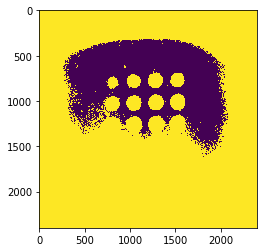

In [191]:
for thr in thresh_li:
    plt.figure()
    plt.imshow(np.any(img2 > [thr, thr, thr], axis=-1))


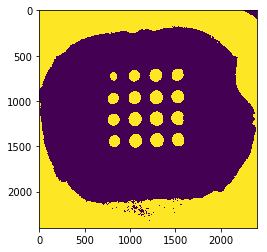

In [103]:
plt.imshow(filtered_im)

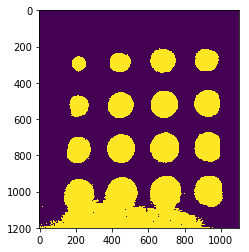

In [162]:
plt.imshow(filtered_im2[500:1700, 600:1700])

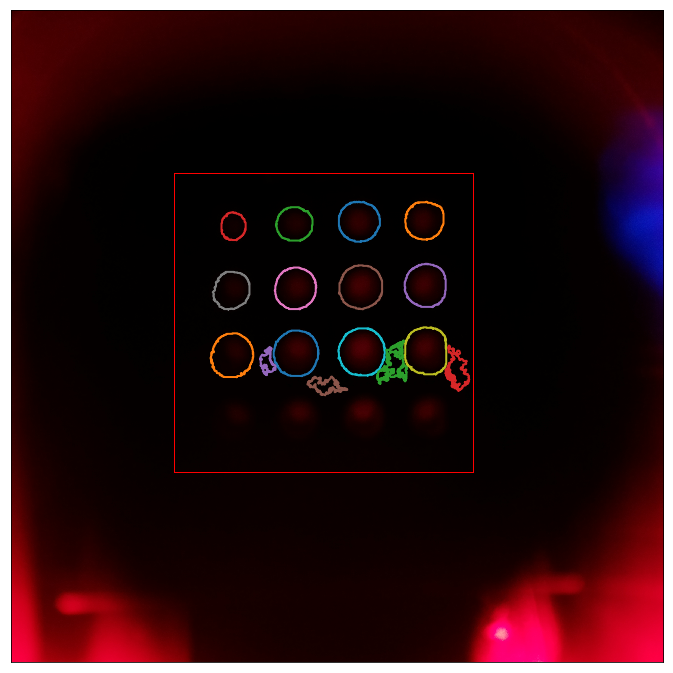

In [188]:
contours2 = skimage.measure.find_contours(im2, 0.1)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img2, interpolation='nearest', cmap=plt.cm.gray)

coords = []
for n, contour in enumerate(contours2):
    if (np.min(contour[:, 1]) > 700 and np.max(contour[:, 1]) < 1700 and np.min(contour[:, 0]) > 600 and np.max(contour[:, 0]) < 1600):
        x_range = np.max(contour[:, 1]) - np.min(contour[:, 1])
        y_range = np.max(contour[:, 0]) - np.min(contour[:, 0])
        if 50 < x_range < 300 and 50 < y_range < 300:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            coords.append(contour)
    rect = matplotlib.patches.Rectangle((600, 600), 1100, 1100, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Text(0.5, 1.0, 'triangle')

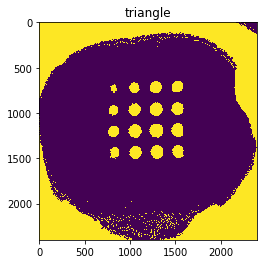

In [89]:
thresh = skimage.filters.threshold_triangle(im[500:1600, 600:1700])
filtered_im = im > thresh
plt.imshow(filtered_im)
plt.title('triangle')

In [90]:
bw = skimage.morphology.closing(im>thresh, skimage.morphology.square(3))

In [91]:
cleared = skimage.segmentation.clear_border(bw)

In [124]:
label_image = skimage.measure.label(cleared[500:1600, 600:1700])
image_label_overlay = skimage.color.label2rgb(label_image, image=img[500:1600, 600:1700])

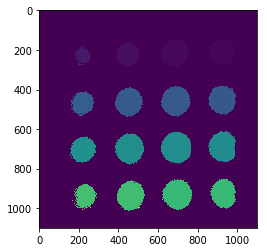

In [125]:
plt.imshow(label_image)

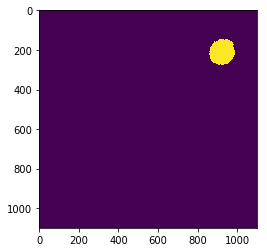

In [114]:
plt.imshow(label_image == 5)

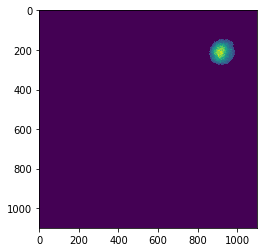

In [119]:
cropped_im = im[500:1600, 600:1700]
cropped_im[label_image!=5] = 0
plt.imshow(cropped_im)

In [121]:
cropped_im.sum()

74110

In [106]:
len(label_image)

1100

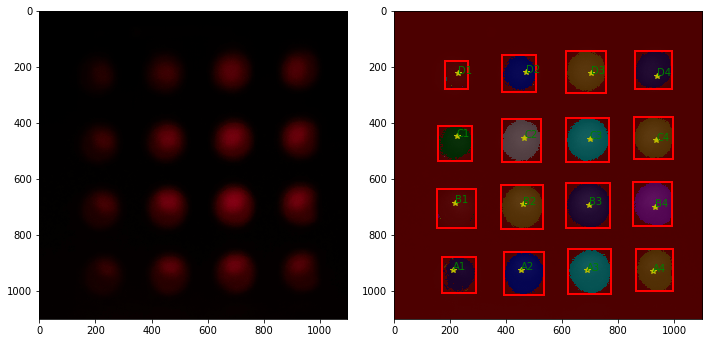

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))
ax[0].imshow(img[500:1600, 600:1700], interpolation='nearest', cmap=plt.cm.gray)
ax[1].imshow(image_label_overlay)
region_li = []
i = 0
j = 1
row = list('ABCD')
for region in skimage.measure.regionprops(label_image, intensity_image=im[500:1600, 600:1700]):
    # take regions with large enough areas
    if 100 <= region.area < 30000:
        # draw rectangle around segmented coins
        region_li.append(region)
        minr, minc, maxr, maxc = region.bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        ax[1].add_patch(rect)
        ax[1].plot(region.centroid[0], region.centroid[1], color='y', marker='*')
        plt.text(region.centroid[0], region.centroid[1], row[i]+str(j), color='g')
        if row[i] == 'D':
            i = 0
            j += 1
        else:
            i += 1

plt.tight_layout()
plt.show()

In [143]:
len(region_li)

16

In [145]:
for region in region_li:
    print(region.centroid, region.bbox, region.area, region.mean_intensity, region.intensity_image.sum() )

(211.2079171015357, 923.7761294170269) (143, 859, 281, 991) 13414 5.524824809900104 74110
(217.13757065860392, 684.9251347443144) (144, 613, 292, 756) 15214 6.165636913369265 93804
(223.2689482005022, 447.76629777736446) (158, 386, 289, 507) 10753 4.527945689575002 48689
(228.84681215233206, 222.47582370560548) (181, 183, 279, 263) 4674 3.4582798459563544 16164
(453.35335035098916, 925.4189534141672) (380, 855, 530, 995) 15670 7.022590938098277 110044
(459.9595878187784, 690.006908065166) (381, 613, 539, 766) 17371 8.022796615048069 139364
(464.1256136676049, 452.82097270406496) (388, 384, 539, 525) 15277 6.564639654382405 100288
(470.8523476911137, 219.1035118354676) (412, 158, 538, 279) 10308 4.2546565774155995 43857
(690.0882370440888, 925.8619622776224) (610, 853, 769, 992) 16807 7.2825608377461775 122398
(694.3115295845573, 693.3086445656735) (614, 614, 776, 771) 19064 9.20756399496433 175533
(699.2102072628601, 456.9991339991917) (622, 381, 780, 531) 17321 7.335488713122799 12705

In [80]:
contours2 = skimage.measure.find_contours(filtered_im, 0.8)

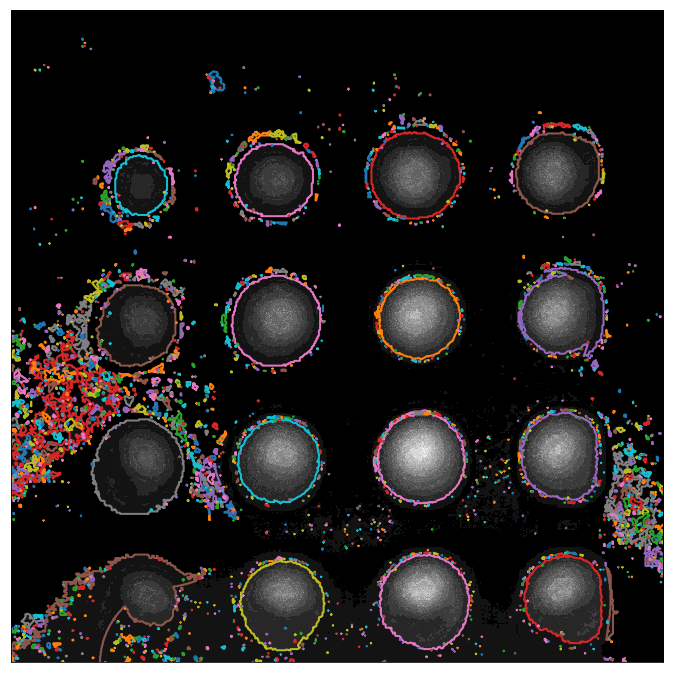

In [82]:
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(im2[500:1600, 600:1700], interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours2):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [72]:
import matplotlib

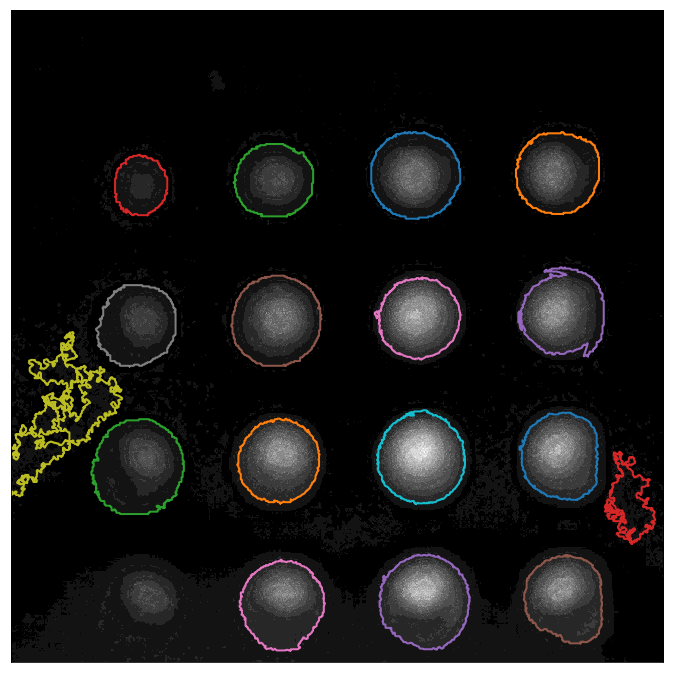

In [88]:
contours2 = skimage.measure.find_contours(filtered_im, 0.5)
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(im2[500:1600, 600:1700], interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours2):
    x_range = np.max(contour[:, 1]) - np.min(contour[:, 1])
    y_range = np.max(contour[:, 0]) - np.min(contour[:, 0])
    if 50 < x_range < 300 and 50 < y_range < 300:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
#     rect = matplotlib.patches.Rectangle((700, 600), 1000, 1000, linewidth=1, edgecolor='r', facecolor='none')
#     ax.add_patch(rect)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

bbox정해서 거기서 웰 찾기 (직경 고려 대신)

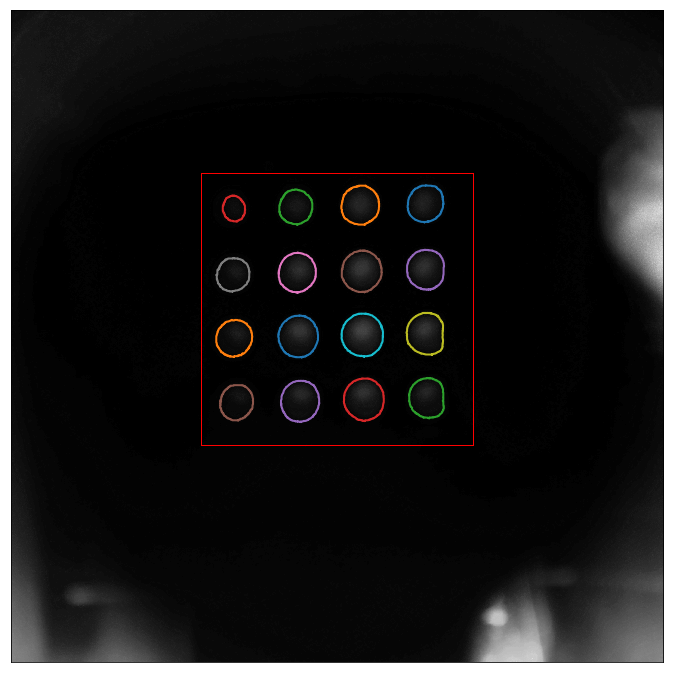

In [84]:
# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(im, interpolation='nearest', cmap=plt.cm.gray)

coords = []
for n, contour in enumerate(contours2):
    if (np.min(contour[:, 1]) > 700 and np.max(contour[:, 1]) < 1700 and np.min(contour[:, 0]) > 600 and np.max(contour[:, 0]) < 1600):
        x_range = np.max(contour[:, 1]) - np.min(contour[:, 1])
        y_range = np.max(contour[:, 0]) - np.min(contour[:, 0])
        if 50 < x_range < 300 and 50 < y_range < 300:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
            coords.append(contour)
    rect = matplotlib.patches.Rectangle((700, 600), 1000, 1000, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [88]:
len(coords)

16

In [87]:
len(coords[0])

575

In [89]:
temp_li = []
for coord in coords:
    temp_li.append(skimage.measure.approximate_polygon(coord, tolerance=40))